# Базовая обработка текста

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://www.nltk.org/api/nltk.html
* https://pymorphy2.readthedocs.io/en/stable/
* https://docs.python.org/3/library/re.html
* https://regex101.com/

## Задачи для совместного разбора

In [ ]:
import re

1. Найдите все суммы (число плюс валюта), которые упоминаются в данном тексте. Выведите результат в виде списка кортежей из двух элементов (число, валюта)

In [ ]:
text = '''During my trip to Europe, I exchanged $10.50 for €20,00 at the currency exchange booth.
With ¥5000, I bought some souvenirs from a local market.
Later, I treated myself to a delicious meal at a restaurant, which cost me £15,99.
Finally, I converted 100₹ into the local currency to buy a traditional Indian artwork.'''

In [ ]:
patt = re.compile(r'([$€¥£₹]?)(\d+[.,]?\d*)([$€¥£₹]?)')
patt.findall(text)

[('$', '10.50', ''),
 ('€', '20,00', ''),
 ('¥', '5000,', ''),
 ('£', '15,99', ''),
 ('', '100', '₹')]

2\. Выясните, встречается ли в представленном фрагменте текста тавтология.

In [ ]:
from nltk import RegexpTokenizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [ ]:
sw = stopwords.words('english')

In [ ]:
tokenizer = RegexpTokenizer(r"\w+")
words = [
    SnowballStemmer.stem(word) for word in tokenizer.tokenize(text) if word.lower() not in sw
]
words[:5]

TypeError: stem() missing 1 required positional argument: 'token'

## Задачи для самостоятельного решения

In [ ]:
!pip install pymorphy2

In [1]:
import re
from nltk import RegexpTokenizer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
# import pymorphy2
from nltk import sent_tokenize, word_tokenize
import os
import matplotlib.pyplot as plt

<p class="task" id="1"></p>

1\. Исследуйте, какие формы слова "кот" или "кошка" встречаются в текстах из файла `moya-semia/Лучше кошки зверя нет 2.csv`. Сгруппируйте найденные слова по начальной форме и представьте результата в виде словаря, где ключом является начальная форма слова, а значением - список форм этого слова, которые встретились в тексте. Примеры подходящих слов: "котейки", "кошечка", "котик" и т.д.

In [ ]:
df = pd.read_csv('data/moya-semia/Лучше кошки зверя нет 2.csv', header=None, usecols=[1])
df.head(2)

,1
0,Завтра мои котейки идут к врачу. А 21-го жду и...
1,Котя скучает по мужу. Со вторника спит на его ...


In [ ]:
morph = pymorphy2.MorphAnalyzer()
lem = WordNetLemmatizer()
data = df[1].values

In [ ]:
tokenizer = RegexpTokenizer(r"\w+")
words = df[1].map(lambda x: tokenizer.tokenize(x))
words = list(pd.core.common.flatten(words.values))

In [ ]:
words[:5]

['Завтра', 'мои', 'котейки', 'идут', 'к']

In [ ]:
cats = [
    (morph.parse(word)[0].normal_form, word) for word in words if ('кош' in word) or ('кот' in word)
]

In [ ]:
morph.parse('котейкам')[0].normal_form

'котейка'

<p class="task" id="2"></p>

2\. Получите и выведите на экран набор имён питомцев, упомянутых в текстах из файла `moya-semia/Лучше кошки зверя нет 2.csv`. Для простоты считайте, что имя питомца начинается с заглавной буквы и стоит не в начале предложения.

In [ ]:
def find_names(text):
    text = sent_tokenize(text)
    lem = WordNetLemmatizer()
    names = []
    for sent in text:
        for word in re.findall(r'[^!\?\.]([А-Я]\w+)', sent):
            names.append(lem.lemmatize(word))
    names = list(set(names))
    return names

res = df[1].apply(lambda x: find_names(x)).sum()

In [ ]:
res[:5]

['Котя', 'Барса', 'Зосю', 'Зоси', 'Мотьку']

<p class="task" id="3"></p>

3\. Вычислите среднюю длину сообщения (в количестве предложений) в различных темах форума газеты "Моя Семья" (каждый файл из каталога `data/moya-semia` соответствует отдельной теме". Представьте результат в виде столбчатой диаграммы. Подпишите рисунок и дайте названия осям.  

In [ ]:
list_files = os.listdir('data/moya-semia')
list_files

['Бенгалы.csv',
 'Лучше кошки зверя нет 2.csv',
 'Немецкая овчарка.csv',
 'Таксы.csv']

In [ ]:
res = []
for file in list_files:
    df = pd.read_csv(f'data/moya-semia/{file}', header=None, usecols=[1])
    res.append(df[1].apply(lambda x: len(sent_tokenize(str(x)))).mean())
res

[12.04861111111111, 9.119949494949495, 7.946428571428571, 6.625]

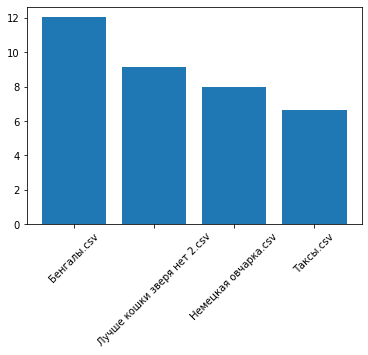

<Figure size 1080x720 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()
plt.xticks(range(len(list_files)), list_files, rotation=45)
plt.figure(figsize=(15, 10))
ax.bar(list_files, res);

<p class="task" id="4"></p>

4\. Замените все текстовые смайлики из файла `livejounal/психология.csv` на соответствующие символы юникода. Для поиска смайликов воспользуйтесь регулярными выражениями. Ниже представлен список (не исчерпывающий) примеров возможных смайликов и символ, на который их нужно заменить:

* :=), =-), =-))), ))) и т.д. -> \u263A
* ;), ;-), ;-)) и т.д. -> \U0001F609
* :D, :-D, =-D, =-DDD и т.д. -> \U0001F600
* :=(, :-(, =-(((, (((, ;-( и т.д. -> \U0001F641

In [2]:
df = pd.read_csv('психология.csv', usecols=['text', 'comments'])
df.head(2)

,text,comments
0,"Выход из депрессии....\nСегодня, 24 марта, Меж...","['Спасибо за полезный пост! Кажется, что сейча..."
1,"Избегание, агрессия, пессимизм: 22 признака де...","['Знаете, я нашла в Вашем посте более сотни пр..."


In [3]:
def replace_smiles(text):
    text = re.sub(r"[:=][-= ]?[)]+|[)]{2,}", '\u263A', text)
    text = re.sub(r"[;][-= ]?[)]+", "\U0001F609", text)
    text = re.sub(r"[:=][-= ]?[D]+", "U0001F600", text)
    text = re.sub(r"[:=][-= ]?[(]+|[(]{2,}", "\U0001F641", text)
    return text

In [4]:
df['text'] = df['text'].apply(lambda x: replace_smiles(x))
df['comments'] = df['comments'].apply(lambda x: replace_smiles(x))

<p class="task" id="5"></p>

5\. Для каждого поста из файла `livejounal/психология.csv` создайте числовой вектор, в котором содержится следующая информация
    * количество абзацев
    * количество предложений
    * количество слов
    * количество смайликов \u263A
    * количество смайликов \U0001F609
    * количество смайликов \U0001F600
    * количество смайликов \U0001F641

Полученный результат представьте в виде тензора `torch.Tensor`.

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
import torch as th
import numpy as np

In [12]:
def create_vecs(text):
    vec = []
    vec.append(len(text.split("\n")))
    vec.append(len(sent_tokenize(text)))
    vec.append(len(word_tokenize(text)))
    vec.append(text.count("\u263A"))
    vec.append(text.count("\U0001F609"))
    vec.append(text.count("\U0001F600"))
    vec.append(text.count("\U0001F641"))
    return vec

In [13]:
vecs = df['text'].apply(lambda x: create_vecs(x)).values

In [15]:
tensor = th.tensor(list(vecs))

In [16]:
tensor[:5]

tensor([[  95,  151, 2697,    2,    0,    0,    0],
        [ 192,  326, 5429,    0,    0,    0,    0],
        [  34,   82, 1129,    0,    0,    0,    0],
        [ 138,  134, 2373,    0,    0,    0,    0],
        [  30,   68,  849,    0,    0,    0,    0]])

<p class="task" id="6"></p>

6\. На основе файла `livejounal/психология.csv` выясните, кто из пользователей обладает наиболее широким словарным запасом (т.е. использовал максимальное количество различных слов в своих постах). При подсчете количества слов не учитывайте различные формы одного и того же слова, а также токены, не являющиеся словами (знаки препинания, цифры и т.д.). Выведите на экран имя пользователя и набор используемых им различных слов.

In [ ]:
df = pd.read_csv('data/livejournal/психология.csv', usecols=['author', 'text'])
df.head(2)

,author,text
0,https://marikarai.livejournal.com/,"Выход из депрессии....\nСегодня, 24 марта, Меж..."
1,https://psychologies.livejournal.com/,"Избегание, агрессия, пессимизм: 22 признака де..."


In [ ]:
sw = stopwords.words('russian')
morph = pymorphy2.MorphAnalyzer()

тут надо еще группировать по авторам и потом еще раз применять set(). Нужно редактировать

In [ ]:
def filter_text(text):
    tok = RegexpTokenizer(r'\w+')
    words = tok.tokenize(text)
    res = set()
    for word in words:
        if (word not in sw) and (not re.findall(r'\d+', word)):
            res.add(lem.lemmatize(word))

    return len(res)

In [ ]:
df['text'] = df['text'].apply(lambda x: filter_text(x))

In [ ]:
vocabulary = df.groupby('author').sum()
vocabulary

,text
author,
https://0-nata-ly.livejournal.com/,425
https://5f-media.livejournal.com/,2401
https://868mag.livejournal.com/,206
https://a-nalgin.livejournal.com/,325
https://abolenkin.livejournal.com/,994
...,...
https://yasviridov.livejournal.com/,217
https://ygashae-zvezdu.livejournal.com/,884
https://youlia-ru.livejournal.com/,23


## Обратная связь
- [ ] Хочу получить обратную связь по решению